# Сборный проект №1

## "Стримчик"


У нас имеется набор данных из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы в период с 1980г. по 2016 г. включительно. Руководство поставило задачу выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Так как на дворе начало декабря 2016г., данные за 2016 год могут быть не полными. 

Согласно имеющемуся у нас описанию данные представлены в виде таблицы со следующими столбцами:

*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы проданных копий)
*	EU_sales — продажи в Европе (миллионы проданных копий)
*	JP_sales — продажи в Японии (миллионы проданных копий)
*	Other_sales — продажи в других странах (миллионы проданных копий)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df.duplicated().sum()

0

### Вывод

Посмотрев на данные можно выделить следующие обьекты для первичной обработки:

* требуется заменить названия столбцов (приведите к нижнему регистру)
* изменить тип данных в столбцах `Year_of_Release`, `User_Score`
* обработать пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` 

Вывод можно стделать следующий: несмотря на большое количество пропусков, в некоторых столбцах, данных для анализа достаточно, можно приступать к предобработке.

## Предобработка данных

In [8]:
df.columns = df.columns.str.lower() # приведем столбцы у нижнему регистру

In [9]:
df['year_of_release'] = df['year_of_release'].fillna(0)   # пропусков в столбце 269, удалим их 
df = df.query("year_of_release != 0")                     # на результате скажется меньше чем если заменить на конкретное число                          
df['year_of_release'] = df['year_of_release'].astype(int) # заменим тип данных на целочисленный                                                                           

In [10]:
df['critic_score'].unique() 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
df['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df[df['user_score'] == 'tbd']['user_score'].count()

2376

В столбце 'user_score' встречается значение 'tbd'. Согласно открытых источников: 
"TBD - аббревиатура от английского To Be Determined (будет определено) 
или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. 
Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований."
Можно предположить что в данных пропуси уже пытались обработать, заменив их на 'tbd'. Нам этот вариант не подходит.
Заменить на 0 тоже нельзя, так как рейтинг 0 тоже присутствует. 
Заменим пропуски и 'tbd' на -1 (отрицательный рейтинг - тоже рейтинг), так как числовое значение в
этом столбце нам необходимо для дальнейшей работы.
'critic_score' судя по всему рейтинг критиков в целых числах, тоже изменим тип данных

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1) # заполним пропуски (-1)
df['critic_score'] = df['critic_score'].astype('int') # изменяем тип на целочисленный

# так же поступим и с рейтингом пользователей:

df['user_score'] = df['user_score'].replace('tbd', np.NaN) # заменяем 'tbd' на NaN
df['user_score'] = df['user_score'].fillna(-1) # заполним пропуски (-1)
df['user_score'] = df['user_score'].astype('float') # изменяем тип на числовой

In [14]:
df['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

А вот тут то мы и можем пропуски заменить на 'tbd', по мне так изящное решение ;), 
типа "бритва Оккама", новых сущностей не пораждаем, и все такое...

In [15]:
df['rating'] = df['rating'].fillna('tbd') # заменим пропуски на 'tbd'

In [16]:
# в столбцах 'name' и 'genre' всего по 2 пропуска, заменим пропуски на 'Misk' так как скорее всего это технические ошибки и на работу в целом не повлияют ('Misc' жанр не определенный, так что там им и место
df['name'] = df['name'].fillna('Misc')
df['genre'] = df['genre'].fillna('Misc')

In [17]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [18]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
df['general_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
df.head() # посмотрим на итог предобработки

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,tbd,31.38


### Вывод

Привели данные к нормальному виду. Можно работать. Судя повсему с данными уже начинали работать, в столбце `User_Score` некоторые пропуски были заменены на 'tbd'(В столбце 'user_score' встречается значение 'tbd'. Согласно открытых источников: "TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.). Можно предположить что в данных пропуски уже пытались обработать, заменив их на 'tbd', нам этот вариант не подходит и пропуски в рейтингах мы заменили на `-1`. Что касательно самих пропусков тут может сказатся зональность выборки(Северная Америка, Европа, Япония), и игры выпускаемые для внутренних рынков просто не оцениваются критиками и пользователями из других регионов. Некоторые игры могут не иметь оценок в принципе, по причине отсутствия каких либо рейтингов во время выхода и популярности. А вот в столбце возрастного рейтинга пропуски заменили на 'tbd'. Для удобства добавили новый столбец `general_sales` с обще мировыми продажами.

## Исследовательский анализ 

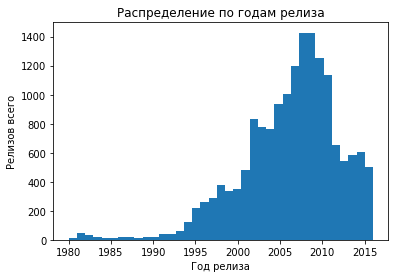

In [20]:
# Построим гистограмму распредиления игр по годам релиза, чтобы опредилить нужны ли данные за весь период наблюдений:
df['year_of_release'].plot(kind='hist', bins=37)
plt.title('Распределение по годам релиза');
plt.xlabel('Год релиза')
plt.ylabel('Релизов всего')
plt.show()

На графике видно что с начала 1990 до 1994 года шел плавный рост производства игр.
А вот с 1994 резкий рост, это можно обьяснить появлением игровой приставки 
PlayStation. Приставки были широко представленны на рынке и до 1994г. (это и SEGA, и 
Nintendo Entertainment System), но все они использовали в качестве носителя картриджи или магнитные носители.
А картриджи это сложно в производстве, дорого и самое главное мало памяти.
PlayStation же в качестве носителя использовали CD, 
которые снимали ограничение по памяти плюс стоимость  производства CD дешевле. 
Попытки использовать CD в качестве носителя были и до этого,
SEGA предлагала для своего MegaDrive дополнительное устройство с CD чейнджером, но эта идея не получила развития.
Бурный рост производства игр в начале 2000х.
можно обьяснить выходом приставок нового поколения (PlayStation 2, и приемник SEGA DreamCast - Xbox).
Но все это дела менувших дней, и не смотря на высокие продажи, в своё время, эти платформы ( и их предшественники) 
устарели и делать анализ по ним на будущее не целесообразно.

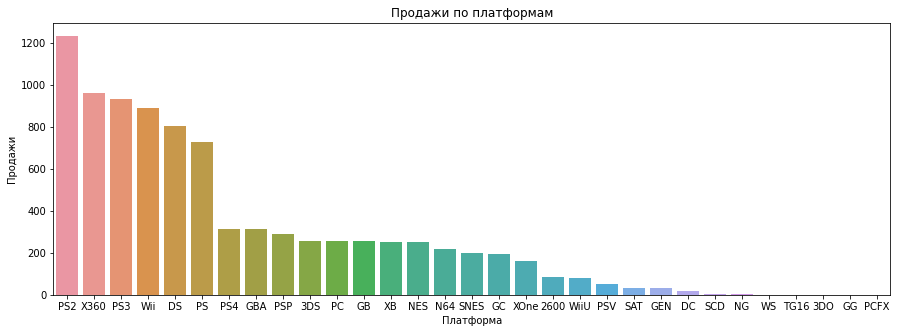

In [21]:
# Построим распредиление продаж по платформам:
platform = df.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values(
    by='general_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=platform.index,y=platform['general_sales'])
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи');

In [22]:
# Выберем платформы с наибольшими суммарными продажами:
df.groupby('platform')['general_sales'].sum().to_frame('general_sales').sort_values(by='general_sales', ascending=False).head(20)

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Из первых 10 платформ, на 2016 год, 10 неактуальные.
Среди платформ с наибольшими продажами можно выделить XOne, PC, WiiU, 3DS, PS4 для последующего анализа,
несмотря на то что PS4 и XOne имеют низкие продажи, на декабрь 2016г. это самые актуальные платформы.

Построим график для отображения продаж на всех платформах, и определим среднюю продолжительность жизни для наиболее популярных:

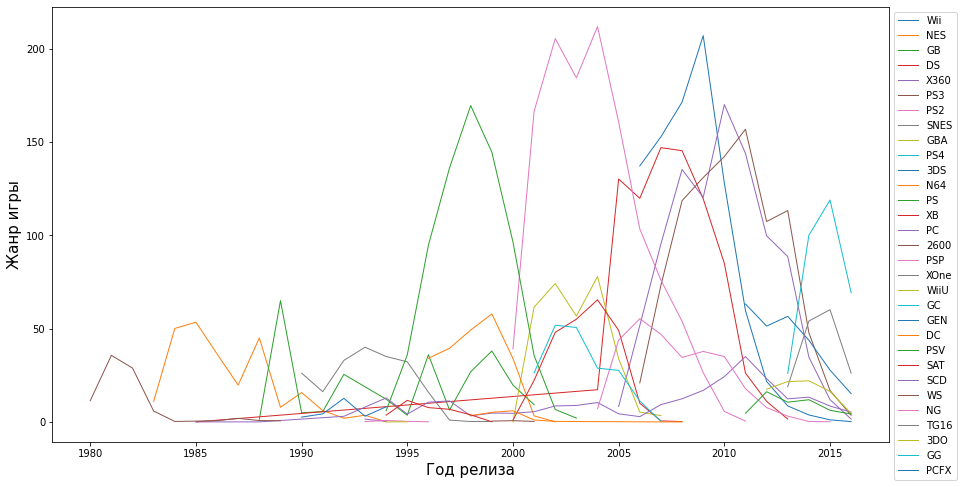

In [23]:
platforms = df['platform'] .unique().tolist() # список платформ

for platform in platforms:
    ax = plt.gca()
    bbox_y = 1
    legend_size = 10
    df_to_plot = df.query('platform == @platform')
    lines = df_to_plot.groupby('year_of_release')['general_sales'].sum().plot(x='year_of_release', y='general_sales',
                                                                    style='-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(15,8))
    ax.set_xlabel('')
   
    ax.legend(platforms, prop={'size':legend_size}, bbox_to_anchor=(1, bbox_y))
    
    plt.xlabel('Год релиза',fontsize=15)
    plt.ylabel('Жанр игры',fontsize=15)
    
plt.show()

* PS Продержалась на рынке 8 лет
* PS2 10 лет активности
* DS 8 лет, хвост от 1985 года скорее всего ошибки (либо одноименные игры, либо ремастер популярных в то время игр)
* X360 9 лет
* PS3 9 лет
* Wii 9 лет
* Исходя из вышесказанного, можно сделать вывод что в среднем платформы живут 9 лет.
* PS2 заменим на XOne, не смотря на выдающиеся показатели по продажам, на момент проведения анализа полностью
* утратила актуальность, а PS на PS4, Wii на WiiU и DS на 3DS соответственно.

В качестве актуального периода можем взять от 2012 и позднее, платформы прошлого покодения,  на момент анализа, ещё не утратили актуальности. На их фоне можно будет оценить перспективы поколения нового. И мы избежим влияния пиков 2008, 2009 и 2010 годов. 

Выберем наиболее подходящие платформы для анализа:

In [24]:
# Отсортируем данные по интересующим нас платформам и периоду наблюдений.
decline_period_data = df[df['year_of_release'] > 2012]
df_top_platforms = decline_period_data[decline_period_data['platform'].isin(['XOne', 'PC', 'WiiU', '3DS', 'PS4'])]

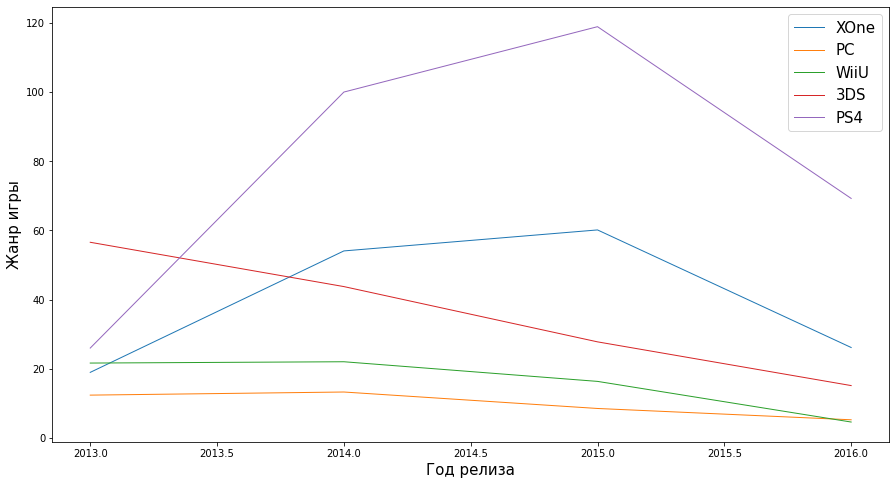

In [25]:
top_platforms = ['XOne', 'PC', 'WiiU', '3DS', 'PS4']

for platform in top_platforms:
    ax = plt.gca()
    bbox_y = 1
    legend_size = 15
    df_to_plot = df_top_platforms.query('platform == @platform')
    lines = df_to_plot.groupby('year_of_release')['general_sales'].sum().plot(x='year_of_release', y='general_sales',
                                                                    style='-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(15,8))
    ax.set_xlabel('')
   
    ax.legend(top_platforms, prop={'size':legend_size}, bbox_to_anchor=(1, bbox_y))
    
    plt.xlabel('Год релиза',fontsize=15)
    plt.ylabel('Жанр игры',fontsize=15)
plt.show()

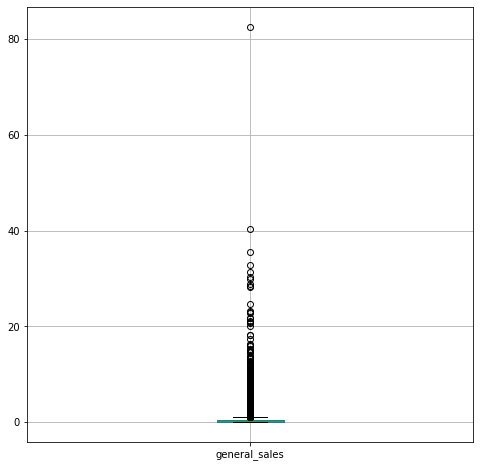

In [26]:
plot = df.boxplot('general_sales', figsize=(8, 8)) # Построим ящик с усами по глобальным продажам.

На таком масштабе хорошо видны лишь выбросы. Выбросы скорее всего представляют из себя данные данные по "топовым" играм продаваемым миллионами копий (можно предположить что чем больше у платформы популярных эксклюзивов, тем больше выбросов). Увеличим масштаб взяв за верхний придел 2 миллиона проданных копий:

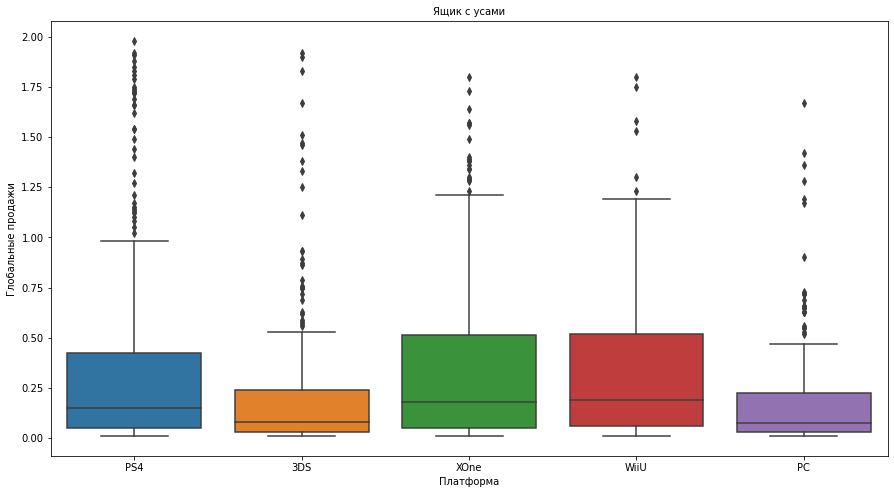

In [27]:
df_top_platforms = df_top_platforms[df_top_platforms['general_sales']<2]
plt.figure(figsize=(15,8))
sns.boxplot(data=df_top_platforms, x='platform', y='general_sales')
plt.title('Ящик с усами', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

 Медиана у всех платформ на разном уровне от 0.1 до 0.25 миллиона проданных копий.
 На первом месте по продажам расположились XOne и WiiU.
 Верхняя граница у XOne и WiiU 1.23 и 1.2 миллиона копий соответственно. 
 Результаты у 3DS и PC самые скромные медиана 0.1, а верхний предел 0.6.

In [28]:
PC = df[(df['platform']=='PC') & (df['user_score'] >= 0) & (df['critic_score'] >= 0) 
         & (df['year_of_release'] > 2012)]  

PS4 = df[(df['platform']=='PS4') & (df['user_score'] >= 0) & (df['critic_score'] >= 0) 
         & (df['year_of_release'] > 2012)]

WiiU = df[(df['platform']=='WiiU') & (df['user_score'] >= 0) & (df['critic_score'] >= 0) 
          & (df['year_of_release'] > 2012)]

XOne = df[(df['platform']=='XOne') & (df['user_score'] >= 0) & (df['critic_score'] >= 0) 
          & (df['year_of_release'] > 2012)]

DS3 = df[(df['platform']=='3DS') & (df['user_score'] >= 0) & (df['critic_score'] >= 0) 
         & (df['year_of_release'] > 2012)]

Посмотрим как влияют продажи игр на PS3, отзывы пользователей и критиков.

In [29]:
XOne['user_score'].corr(XOne['general_sales']) # коэфициент корреляции

-0.09400318326920852

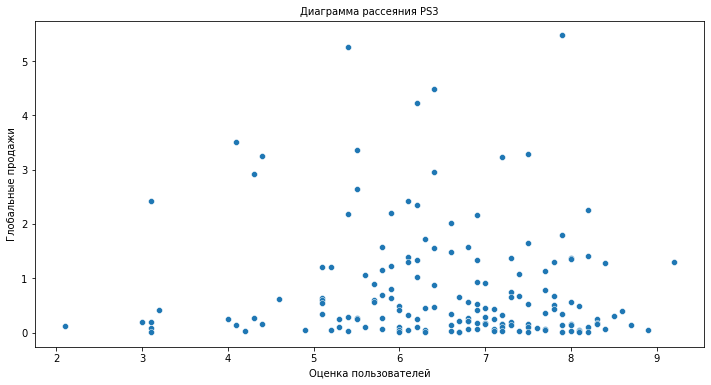

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='general_sales', data=XOne)
plt.title('Диаграмма рассеяния PS3', fontsize=10)
plt.xlabel('Оценка пользователей', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

Корреляция между оценками пользователей и продажами отсутствует.

In [31]:
XOne['critic_score'].corr(XOne['general_sales']) # коэфициент корреляции

0.41042203561296375

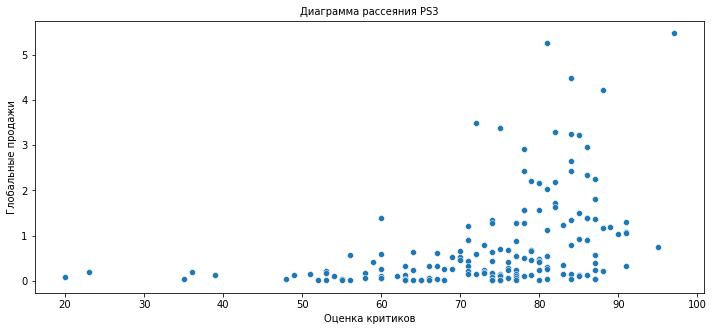

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='critic_score', y='general_sales', data=XOne)
plt.title('Диаграмма рассеяния PS3', fontsize=10)
plt.xlabel('Оценка критиков', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

С ростом оценок критиков растут и продажи.

Построим матрицу корреляции для сравнения с продажами на других платформах:

In [33]:
# Отфильтруем данные по интересующим нас параметрам:
pc_data = PC[['general_sales' ,'critic_score', 'user_score']]
ps4_data = PS4[['general_sales' ,'critic_score', 'user_score']] 
wiiu_data = WiiU[['general_sales' ,'critic_score', 'user_score']]
xone_data = XOne[['general_sales' ,'critic_score', 'user_score']]
ds3_data = DS3[['general_sales' ,'critic_score', 'user_score']] 

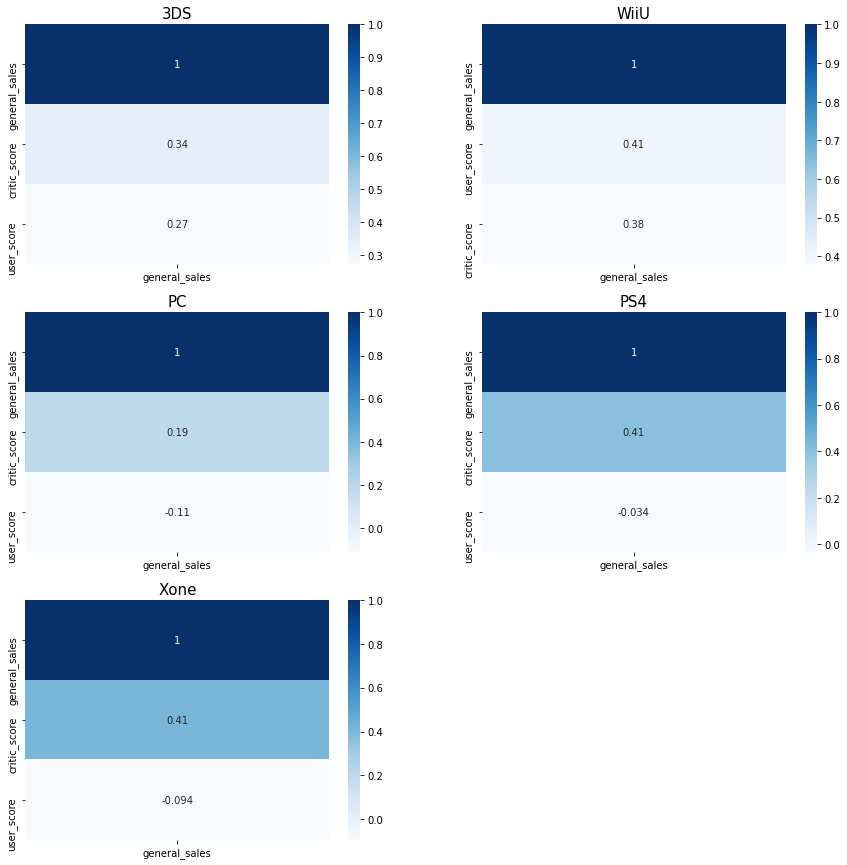

In [34]:
# Матрица корреляции:
fig, axes = plt.subplots(2, 3, figsize=(15,15))

plt.subplot(3, 2, 1)
plt.title("3DS", fontsize=15)            
sns.heatmap(ds3_data.corr()[['general_sales']].sort_values(by='general_sales', ascending=False), cmap="Blues", annot=True)

plt.subplot(3, 2, 2)
plt.title("WiiU", fontsize=15)
sns.heatmap(wiiu_data.corr()[['general_sales']].sort_values(by='general_sales', ascending=False), cmap="Blues", annot=True)


plt.subplot(3, 2, 3)
plt.title("PC", fontsize=15)            
sns.heatmap(pc_data.corr()[['general_sales']].sort_values(by='general_sales', ascending=False), cmap="Blues", annot=True)

plt.subplot(3, 2, 4)
plt.title("PS4", fontsize=15)            
sns.heatmap(ps4_data.corr()[['general_sales']].sort_values(by='general_sales', ascending=False), cmap="Blues", annot=True)

plt.subplot(3, 2, 5)
plt.title("Xone", fontsize=15)            
sns.heatmap(xone_data.corr()[['general_sales']].sort_values(by='general_sales', ascending=False), cmap="Blues", annot=True);

Выводы:

*    Оценки пользователей не оказывает существенно на продажи, кроме продуктов Nintendo тут корреляция прослеживается(возможно менее токсичное сообщество играет роль);
*    Зависимость продаж от оценки критиков слабая, но прослеживается.

In [35]:
df_sales = df_top_platforms.pivot_table(index=['genre'], values='general_sales', aggfunc=['mean', 'median'])
df_sales = df.groupby(['genre']).agg({'general_sales':['mean', 'median']})
df_sales.columns = ['mean', 'median']
df_sales = df_sales.sort_values(by='mean', ascending=False)
df_sales.head()

,mean,median
genre,,
Platform,0.940262,0.27
Shooter,0.803519,0.24
Role-Playing,0.628683,0.18
Racing,0.590122,0.19
Sports,0.567940,0.22


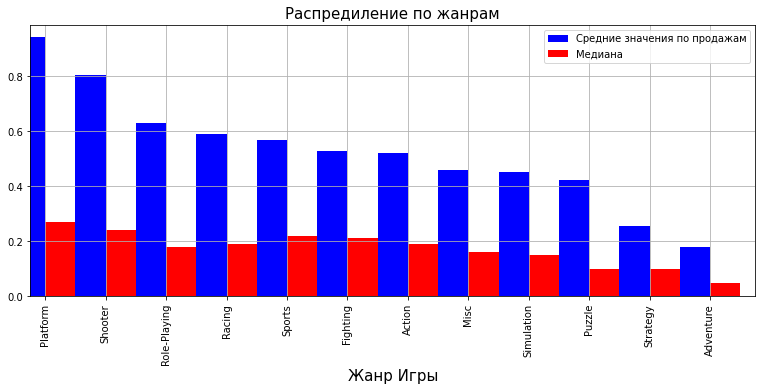

In [36]:
ax = plt.gca()

ax1 = df_sales['mean']
ax2 = df_sales['median']

ax1.plot(kind='bar', figsize=(13,5), ax=ax, color='b', position=1)
ax2.plot(kind='bar', figsize=(13,5), ax=ax, color='r', position=0)

plt.grid()
plt.legend(['Средние значения по продажам', 'Медиана'])
plt.title('Распредиление по жанрам', fontsize=15)
plt.xlabel('Жанр Игры', fontsize=15);

 Первая тройка Platform, Shooter, Role-Playng. 
 Заключающая тройка  Puzzle, Strategy, Adventure.
 Является ли жанр Shooter прибыльнее жанра Puzzle? На первый взгляд хочется сказать - Да!
 Но если учесть трудозатраты, затраты на производство игр класса AAA, то может оказаться 
 что не каждая игра жанра Shooter будет прибыльней некоторой "веселой фермы".

### Вывод

Мы провели исследовательский анализ и сделали кое какие выводы:

* Рынок компьютерных игр плавно развивался до 1994 года, начиная с 1994 года бурный рост продаж. Связанно это прежде всего с выходом таких латформ как PlayStation, PlayStation 2 и т.д.
* Но рост заканчивается пиком на 2008 году, что скорее всего связанно с мировым кризисом, затронувшим и рынок интерактивных развлечений. Далее снижение продолжилось и в 2010, и тут рынок комьпьютерных игр получил новы удар - так называемый "Мобильный гейминг".
* С момента выхода PlayStation наблюдается закономерность: игровые платформы живут 8-10 лет, а потом их заменяют платформы следующего поколения (может быть мы нашли третий закон Мура???)
* В выбранных нами платформах, наблюдается зависимость между оценками критиков и профажами игр, зависимости между оценками пользователей и продажами не наблюдается(кроме Nintendo). Неудевительно ведь компетентное мнение всегда важнее чем чьи-то несбывшиеся надежды.
* Самым популярным жанром является жанр Platform, Adventure замыкает рейтинг.
* Пик популярности платформы наступает примерно в середине ее жизненного цикла (примерно 4 года с момента выхода).

## Портрет пользователя для каждого региона

In [37]:
# Создадим функцию для отрисовки распределения продаж по регионам (Платформа, жанр, рейтинг):
def port_user(r, g, b):
    data_reg = df_top_platforms.groupby(r).agg({g: 'sum'}).sort_values(by=g, ascending=False)[:5]
    title_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    color_dict = {'na_sales': 'Red', 'eu_sales': 'Green', 'jp_sales': 'Blue'}
    graph = data_reg.plot(kind='bar', ec='black', title=title_dict[g], ax=axes[b], 
                   fontsize=9, color=color_dict[g], rot=10)
    graph.legend(prop={'size':10})
    graph.set_xlabel('')
    graph.title.set_size(12)

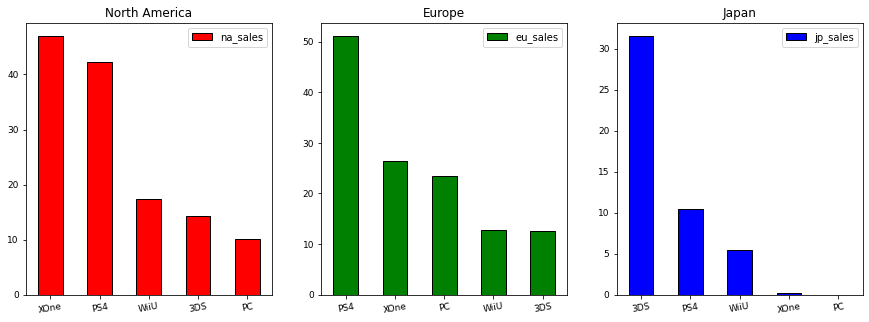

In [38]:
# Распределение по платформами:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

port_user('platform', 'na_sales', 0)
port_user('platform', 'eu_sales', 1)
port_user('platform', 'jp_sales', 2)

* В Японии на первом месте 3ds далее ps4 и WiiU, XOne и PC 4 и 5 место. 
* На вропейском рынке  на первом месте PS4, на Северо Американском XOne.
* В отличие от Японии, ПК гейминг уверенно присутствует на рынках Европы и Северной Америки.

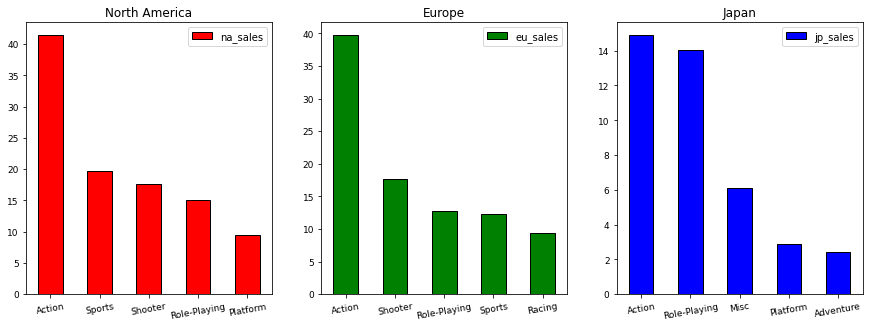

In [39]:
# Распредиление по жанрами
fig, axes = plt.subplots(1, 3, figsize=(15,5))

port_user('genre', 'na_sales', 0)
port_user('genre', 'eu_sales', 1)
port_user('genre', 'jp_sales', 2)

* Жанр Action лидирует во всех регионах.
* В Японии на ряду с Action так же популярен жанр Role-Plaing(не значительно уступая первому месту).

ПОсмотрим влияние возростного рейтинга на продажи:

* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.Первоначально "K-A" ("Kids to Adults").
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Заменим устаревший рейтинг 'K-A' на новый 'E' (обозначают одно и тоже)


/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(


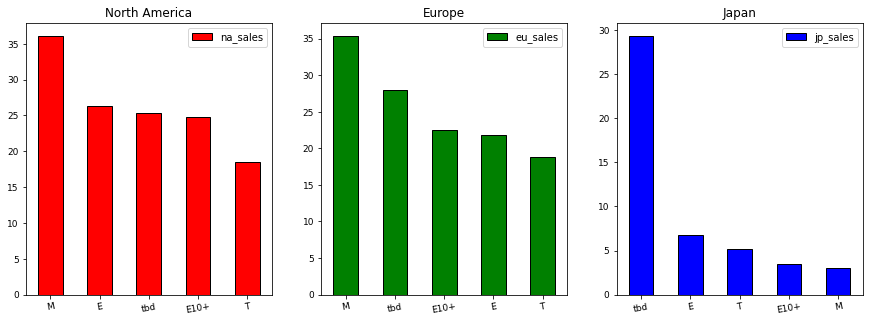

In [40]:
decline_period_data['rating'].where(~(decline_period_data.rating == 'K-A'), other='E', inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(15,5)) # Распределение по возрастному рейтингу:

port_user('rating', 'na_sales', 0)
port_user('rating', 'eu_sales', 1)
port_user('rating', 'jp_sales', 2)

Рейтинг ESRB влияет на продажи существенно так: 
* В Северной Америке и Европе лидирует рейтинг «M» («Mature») — «Для взрослых» (за последние годы игры повзрослели, аудитория становится старше), а в Японии аж на 5.
* «E» («Everyone») — «Для всех» — занимает 2 места в регионах Америки и Японии.
* Рейтинг «E10+» («Everyone 10 and older») на 4 месте США, и на 3 Европпа, в Японии на 4.
* 'tbd' наш рейтинг, в него вошли все игры для которых возрастной рейтинг не был указан. Тому могут быть разные причины, для каких-то игр рейтинг еще не указан, а какие-то игры вышли до существования каких либо рейтингов ну и человеческий фактор исключать нельзя. А в Японии вообще свой собственный рейтинг CERO, и 'tbd' на первом месте как раз на это нам намекает.

### Вывод



Удалось составить портрет пользователя по регионам Северной Америки, Европы и Японии.

По топ-5 поулярных платформ картина следующая:

* На Японском рынке доминируют отечественные игровые платформы. Причем портативная консоль 3DS на первом месте.
* Европейский рынок разнообразнее, но большинство за Японскими консолями. XOne удерживается на 2 месте.
* На Североамериканском рынке на первом месте XOne/

По топ-5 жанрам:

* В Северной Америке Action, Sports, Shooter, Role-Plaing, Platform
* В Европе Action, Shooter, Role-Plaing, Sports Racing
* В Японии Action, Role-Plaing, Misc, Platform, Adventurer

Так же удалось выяснить что возрастной рейтинг ESRB, оказывает существенное влияние на продажи игр.

## Проверка гипотез

Во время выполнения работ созрели 2 гипотезы, которые могли бы помочь руководству в разрабатке стратегии развития на будующий год. А именно:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

*Первая гипотеза:* 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H0 - средние пользовательские рейтинги жанров Xbox One  и PC одинаковые.
* H1 - средние пользовательские рейтинги жанров Xbox One  и PC разные.

In [41]:
xone = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score'] # пользовательский рейтинг XOne
pc = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score'] # пользовательский рейтинг PC

                  
alpha = 0.05 # критический уровень статистической значимости


results = st.ttest_ind(xone, 
                       pc, equal_var=False) # проверяем гипотезу

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


*Вторая гипотеза:* 

Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1 - средние пользовательские рейтинги жанров Action и Sports разные.

In [42]:
action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score'] # пользовательский рейтинг Action
sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score'] # пользовательский рейтинг Sports


alpha = 0.05 # критический уровень статистической значимости


results = st.ttest_ind(action, 
                       sports, equal_var=False) # проверяем гипотезу

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


### Вывод по работе с гипотезами

По работе над гипотезами. Для первой гипотезы удалось сформулировать нулевую и альтернативную гипотезы так:

* H0 - средние пользовательские рейтинги жанров Xbox One  и PC одинаковые;
* H1 - средние пользовательские рейтинги жанров Xbox One  и PC разные.

Для второй гипотезы сформулировать нулевую и альтернативную гипотезы так:

* H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1 - средние пользовательские рейтинги жанров Action и Sports разные.

Так как в обоих случаях выборки независимы между собой, для проверки гипотез выбрали метод ttest_ind. Критический уровень статистической значимости взяли 0.05.

В ходе проверки первой гипотезы удалось отвергнуть Н0. 
Во втором случае не удалось отвергнуть нулевую гипотезу.

## Общий вывод

Поставленное от руководства задание выполненно. Данные проверены, исправлены сгрупированы. Проведен статистический анализ и проверка гипотез.
В ходе проведения работ удалось вустановить:

* Высокие оценки критиков положительно сказываются на продажах игр;
* Пользовательские рейтинги на продажи существенно не влияют (кроме продуктов Nintendo).

На данный момент игровая индустрия переживает не лучшие свои годы. И ждать результатов 2008 года не приходится. 

При планировании стратегии развития на будующий год следует обратить внимание на следующее:

* Самыми популярными играми в США и Европе остаются игры с возростным рейтингом «M» («Mature») — «Для взрослых», т.е. аудитория интерактивных развлечений растет.
* так же в качестве целевой аудитории следует рассматривать и детей старше 6 лет, продажи с данным рейтингом занимают второе место;
* больше внимания уделить жанрам Action, Role_Plaing и Shooter.

Исходя из выявленной нами средней продолжительности жизни игровых платформ, следует расширить поддержку актуальных на данный момент PlayStation 4 и Xbox One, так как пик популярности у них впереди.

Спасибо за уделённое внимание!